# 3.3 데이터 시각화 하기 

### 3.3.2. 시계열 그래프 그리기

In [1]:
# 예제 3-37 kto_total.xlsx 파일 df로 불러오기 
import pandas as pd  
df = pd.read_excel('./files/kto_total.xlsx')
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [2]:
# 예제 3-38 그래프에서 한글 표기를 위한 글자체 변경(윈도우, 맥os 각각의 경우에 대해서 처리)
from matplotlib import font_manager, rc
import platform 

if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else: 
    print('Check your OS system')


In [3]:
# 예제 3-39 matplotlib 라이브러리 불러오기 
import matplotlib.pyplot as plt

In [4]:
# 예제 3-40 중국 국적 데이터 필터링하기 
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


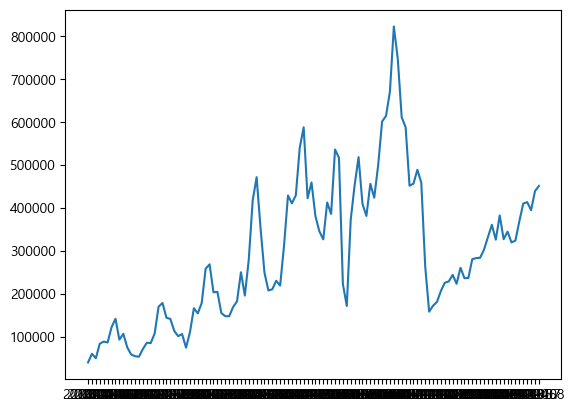

In [5]:
# 예제 3-41 시계열 그래프 그리기 1
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.show()

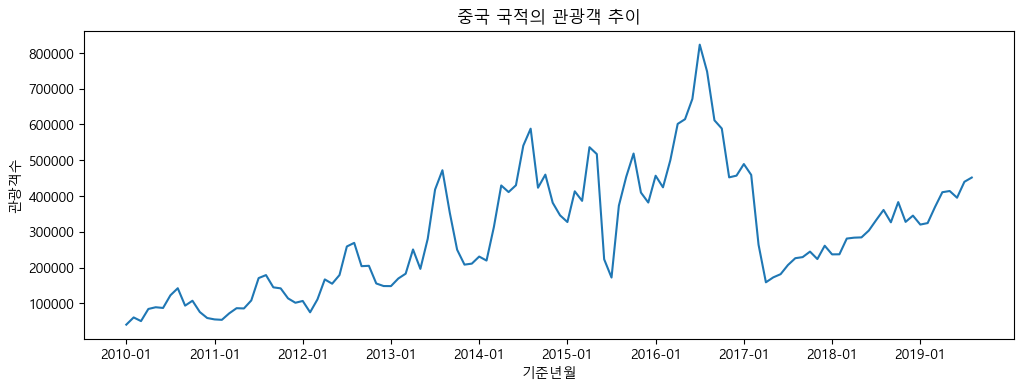

In [6]:
# 예제 3-42 시계열 그래프 그리기 2(꾸미기)
## 그래프 크기 조절 
plt.figure(figsize = (12, 4))

## 그래프 내용 설정 
plt.plot(df_filter['기준년월'], df_filter['관광'])

## 그래프 타이틀, X축, Y축 이름 달기 
plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

## x 축 눈금 값 설정 
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01'])

## 그래프 표현하기 
plt.show()

In [7]:
# 예제 3-43 우리나라 방문하는 외국인 관관객 top5 리스트 만들기 
cntry_list = ['중국', '일본', '대만', '미국', '홍콩']

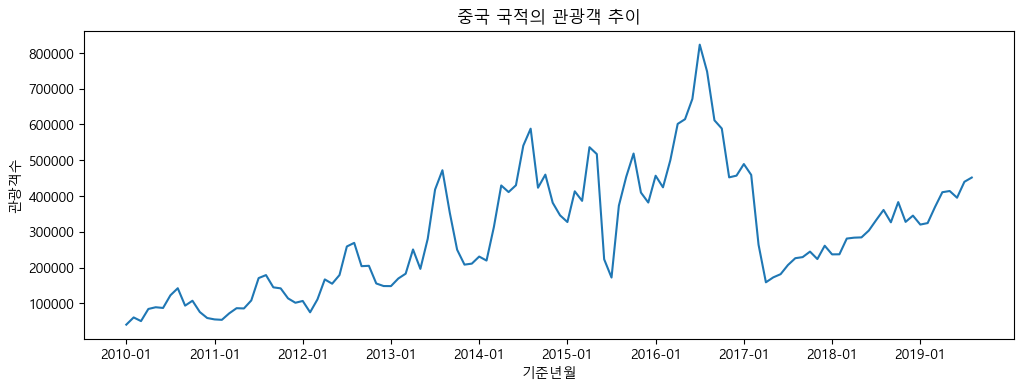

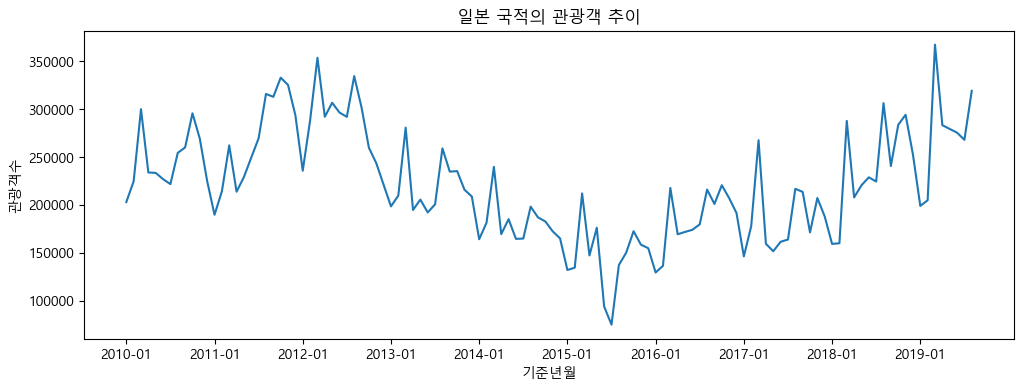

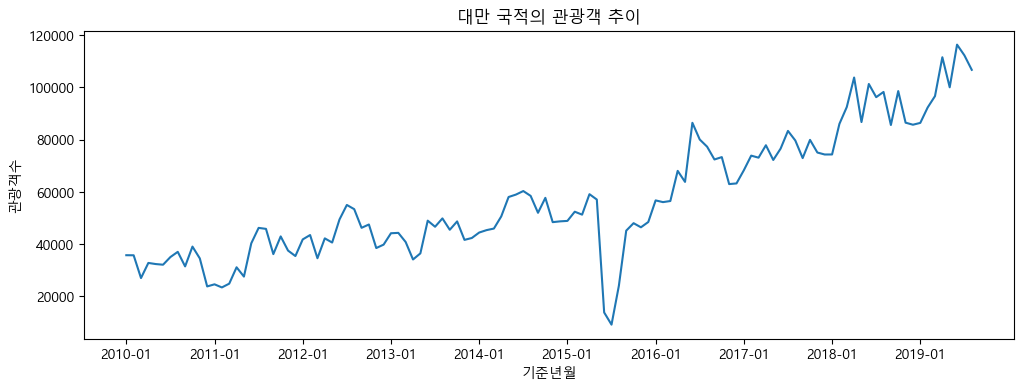

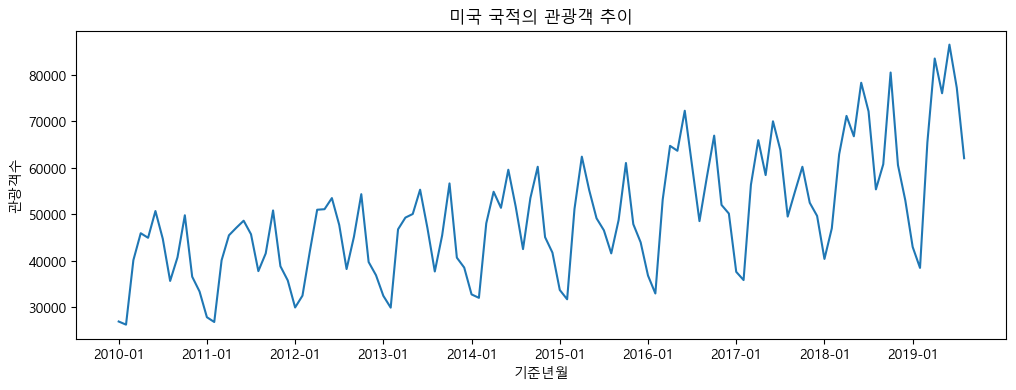

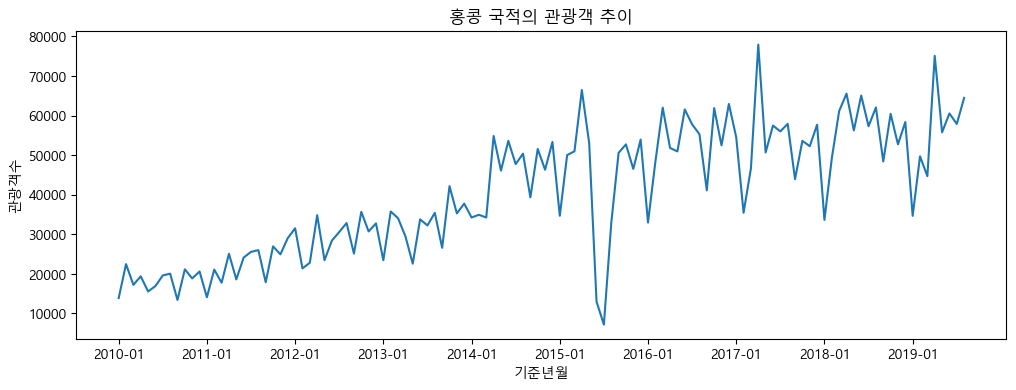

In [8]:
# 예제 3-44 반복문으로 여러 그래프 그리기 
for cntry in cntry_list: 
    # 국적 관광객만 추출하기 
    condition = (df['국적'] == cntry)
    df_filter = df[condition]

    # 그래프 그리기 
    ## 그래프 크기 조절 
    plt.figure(figsize = (12, 4))
    
    ## 그래프 내용 설정 
    plt.plot(df_filter['기준년월'], df_filter['관광'])

    ## 그래프 타이틀, X축, Y축 이름 달기 
    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')

    ## x 축 눈금 값 설정 
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01'])

    ## 그래프 표현하기 
    plt.show()

### 3.3.3. 히트맵 그래프 그리기

In [9]:
# 예제 3-45 df 데이터 head() 함수로 살펴보기 
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


In [10]:
# 예제 3-46 str.slice() 함수를 이용해 년도, 월 컬럼 만들기 
df['년도'] = df['기준년월'].str.slice(0,4)
df['월'] = df['기준년월'].str.slice(5, 7)
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


In [11]:
# 예제 3-47 중국인 관광객 필터링하기
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05


In [12]:
# 예제 3-48 pivot_table() 함수 이용하기 
df_pivot = df_filter.df_pivot(values = '관광'
                         , index = '년도'
                         , columns = '월')

df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


In [13]:
# 예제 3-49 히트맵 그래프 그리기에 필요한 라이브러리 import 
import matplotlib.pyplot as plt 
import seaborn as sns 

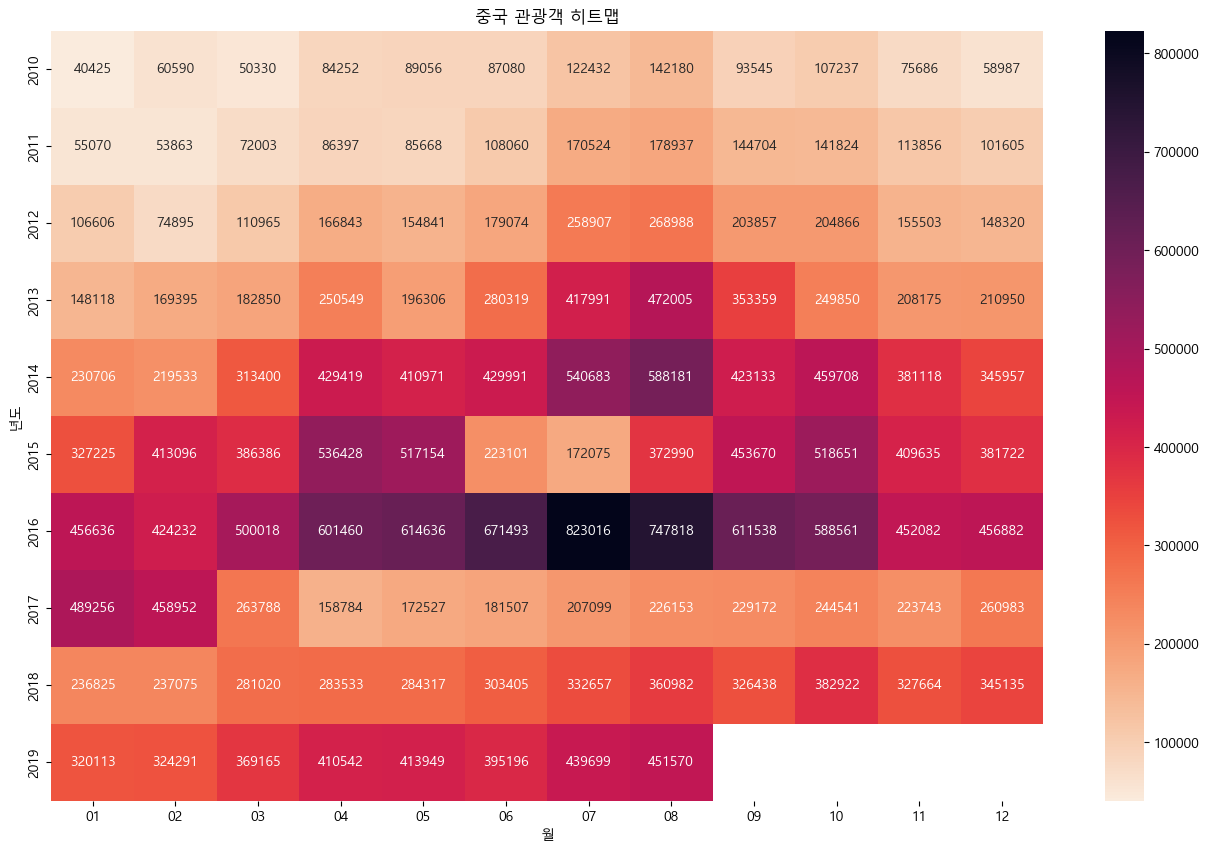

In [14]:
# 예제 3-50 히트맵 그리프 그리기 
## 그래프 크기 설정 
plt.figure(figsize = (16, 10))

## 히트맵 그래프 그리기 
sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')
# annot=True는 각 셀에 숫자를 표시할지 여부
# fmt='.0f'는 숫자의 형식을 지정하는데, 여기서는 소수점 이하 자리를 표시하지 않도록 설정
# cmap='rocket_r'는 히트맵의 색상 맵을 지정

## 그래프 타이틀 달기 
plt.title('중국 관광객 히트맵')

## 그래프 표현 
plt.show()

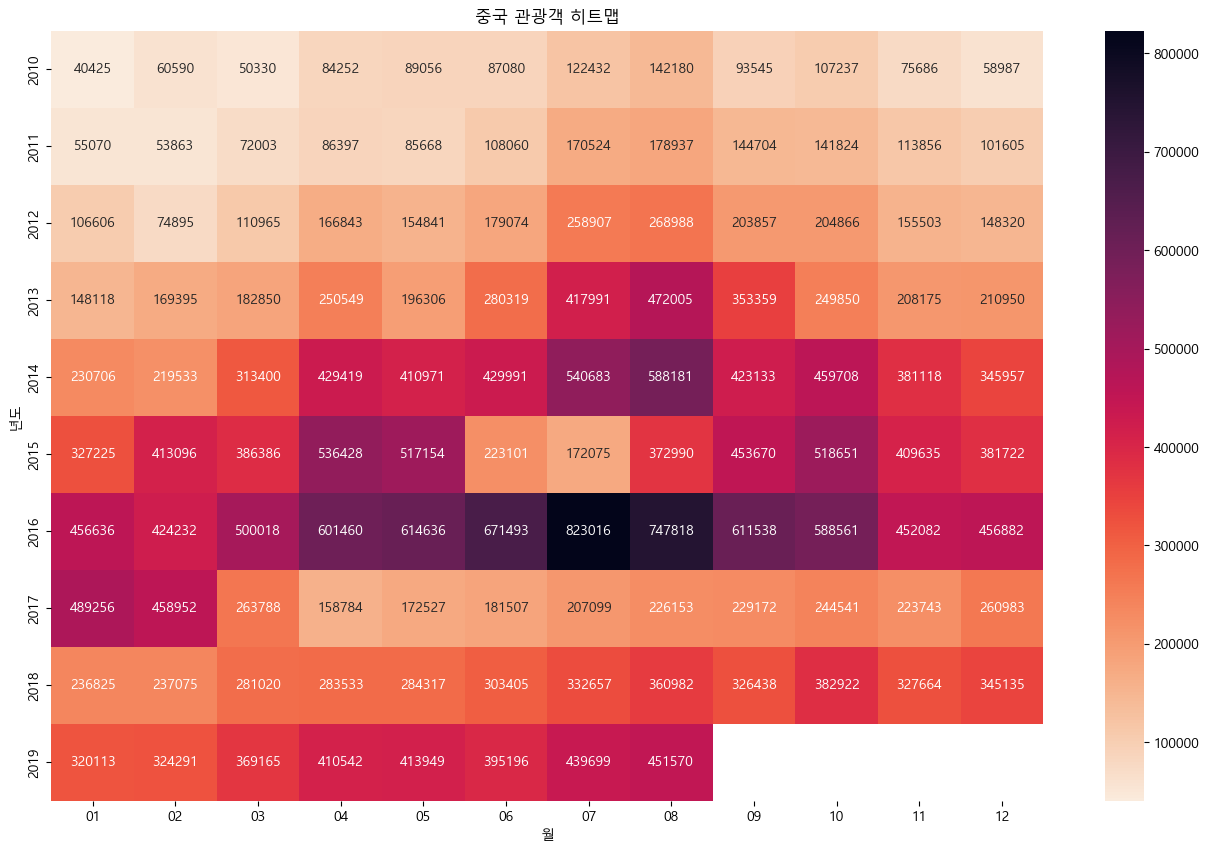

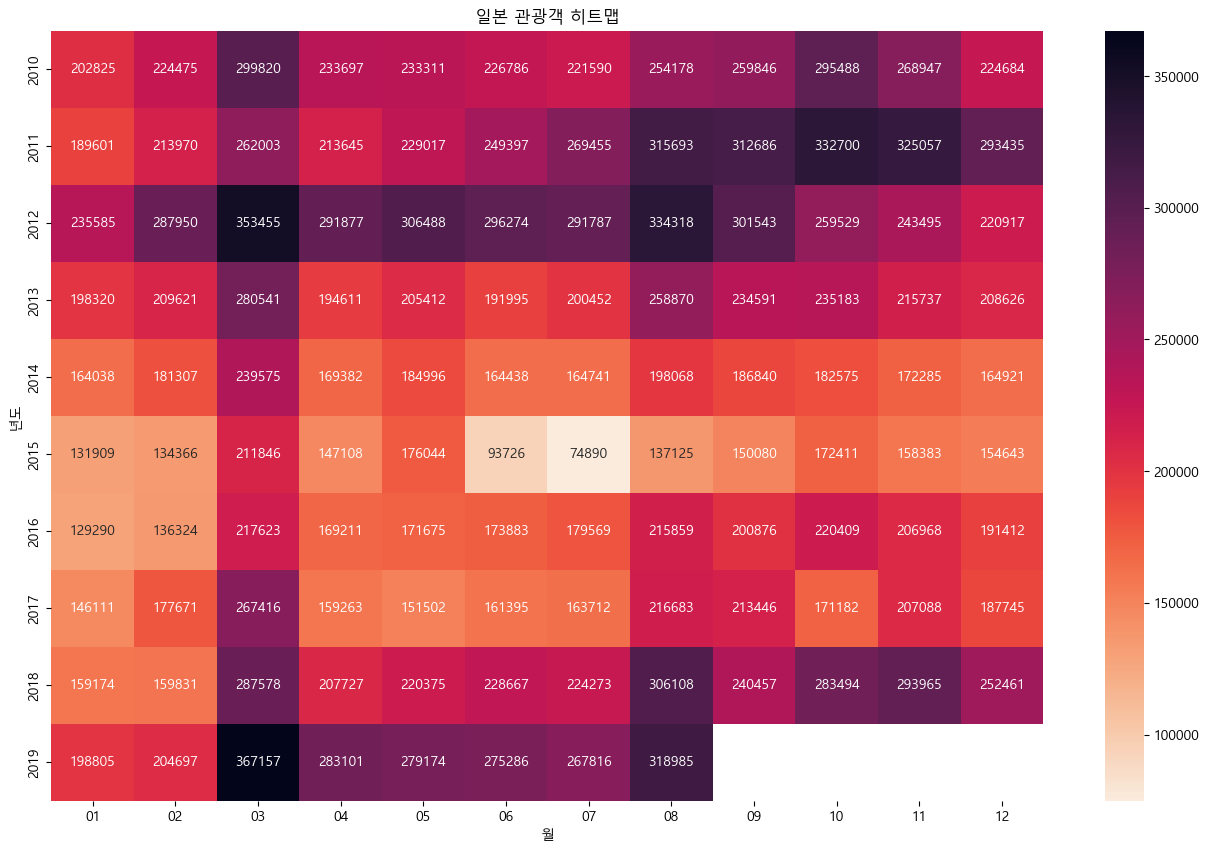

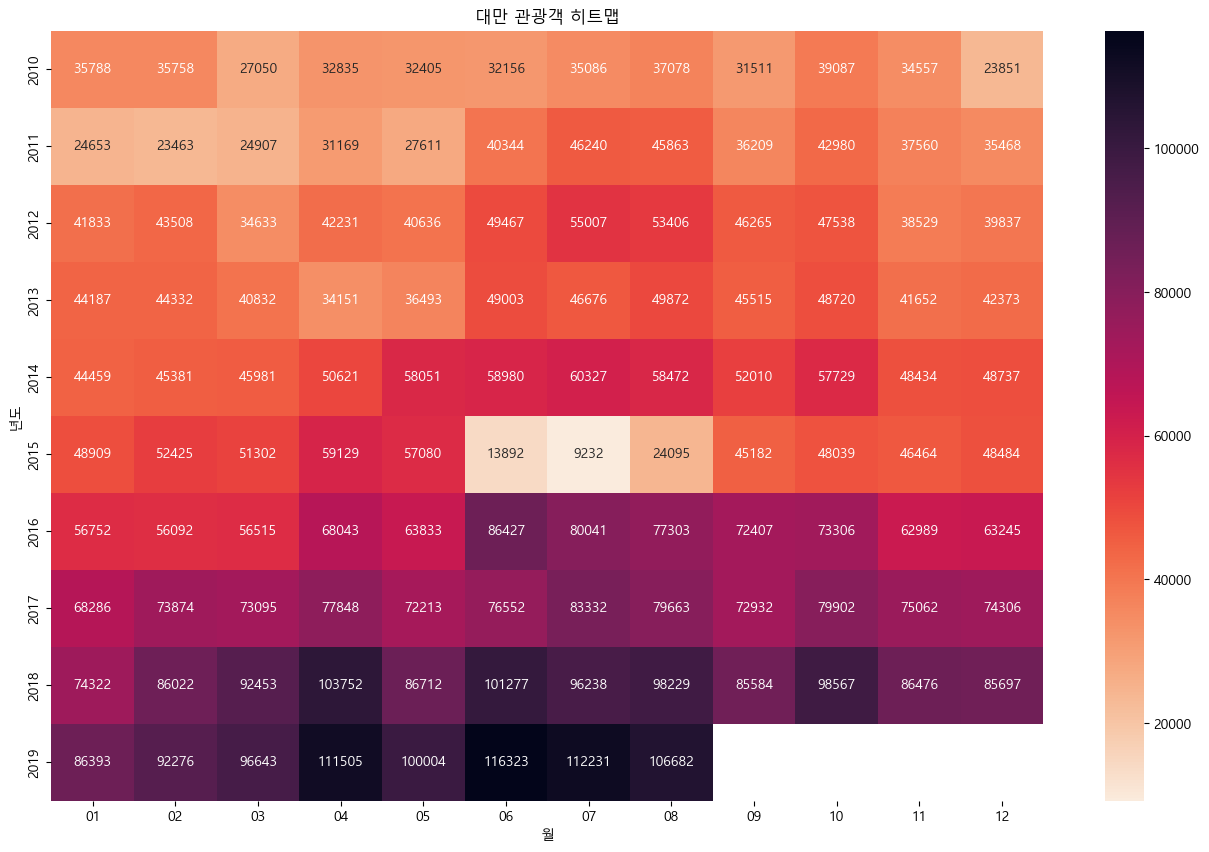

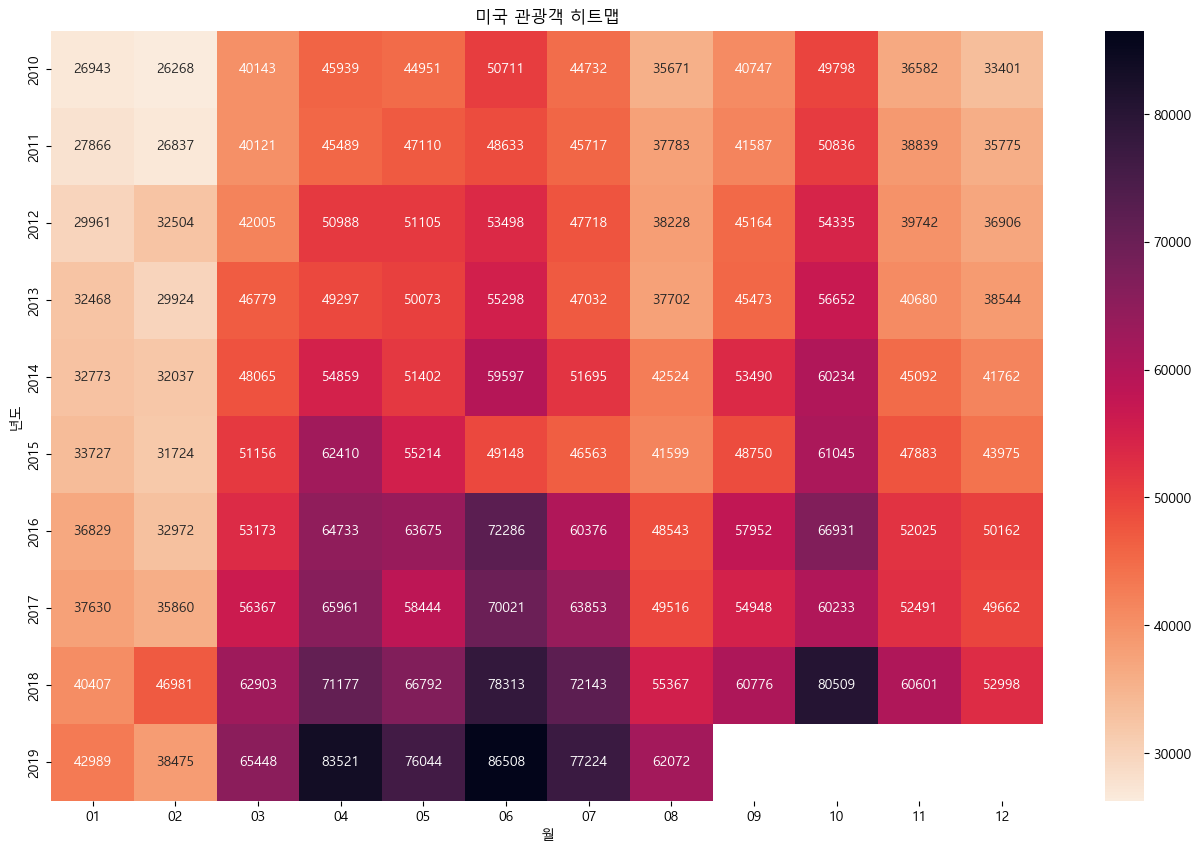

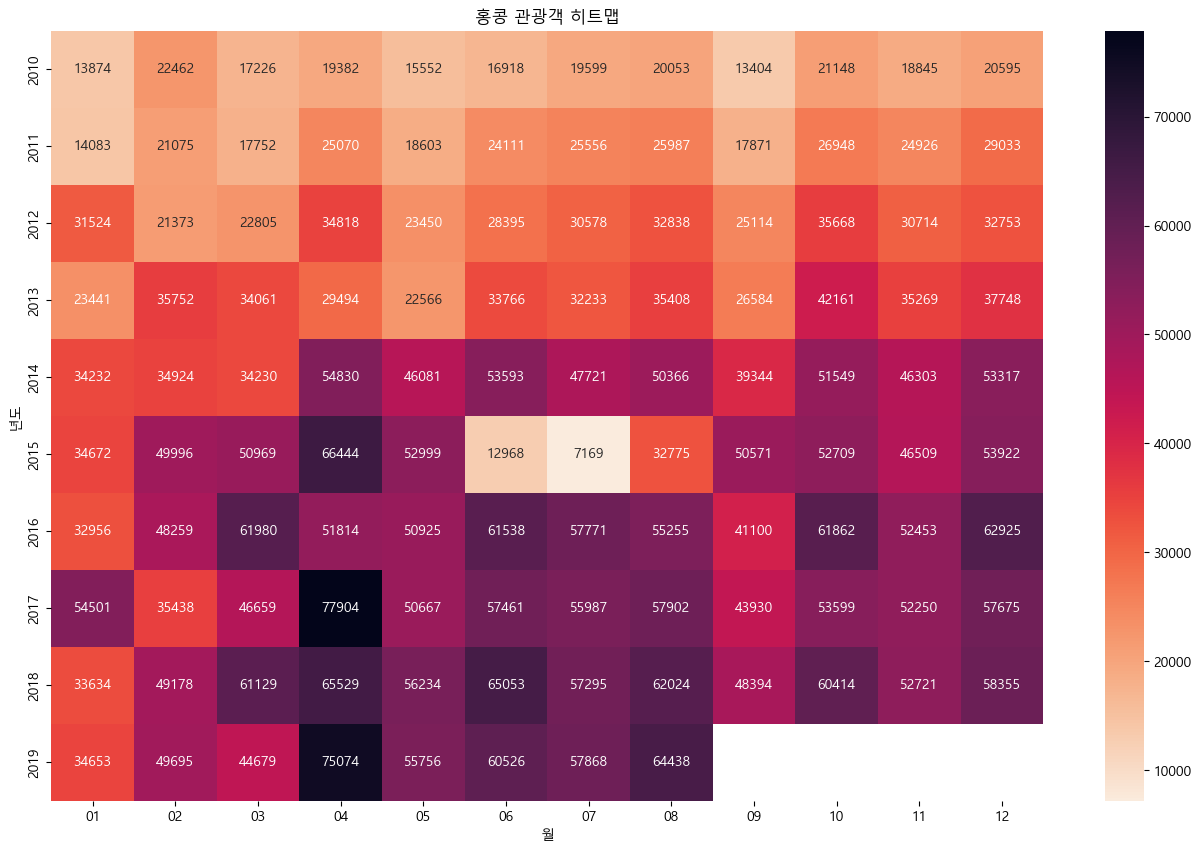

PermissionError: [Errno 13] Permission denied: './files/[국적별 관광객 데이터] 홍콩.xlsx'

In [17]:
# 예제 3-51 반복문으로 top5 국가 히트맵 그래프 그리기 
for cntry in cntry_list: 
    condition = (df['국적'] == cntry)
    df_filter = df[condition]
    
    df_pivot = df_filter.pivot_table(values = '관광'
                             , index = '년도'
                             , columns = '월')
    
    # 그래프 크기 설정 
    plt.figure(figsize = (16, 10))

    # 히트맵 그래프 그리기 
    sns.heatmap(df_pivot, annot = True, fmt = '.0f', cmap = 'rocket_r')

    # 그래프 타이틀 달기 
    plt.title('{} 관광객 히트맵'.format(cntry))

    # 그래프 표현 
    plt.show()
    file_path = './files/[국적별 관광객 데이터] {}.xlsx'.format(cntry)
    df_filter.to_excel(file_path, index= False)
    
# annot: 각 셀에 값을 표시할지 여부를 결정합니다.
# True: 각 셀에 값을 표시합니다.
# False: 각 셀에 값을 표시하지 않습니다.

# fmt: 각 셀에 표시되는 값의 형식을 결정합니다.
# 'd': 정수 형식으로 표시합니다.
# 'f': 실수 형식으로 표시합니다.

# cmap: 히트맵에 사용할 색상 맵을 설정합니다.
# vmin: 히트맵의 최소값을 설정합니다.
# vmax: 히트맵의 최대값을 설정합니다.
# linewidths: 격자선의 너비를 설정합니다.
# linecolors: 격자선의 색상을 설정합니다.
# alpha: 히트맵의 투명도를 설정합니다.